In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Tr=pd.read_csv('titanic_train.csv')

In [3]:
Tr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Tr.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [5]:
Tr.shape

(891, 12)

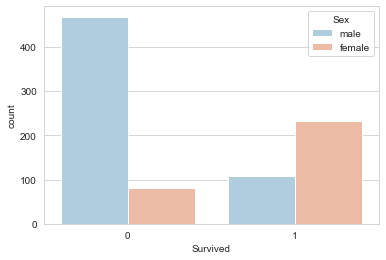

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=Tr,palette='RdBu_r',hue='Sex')

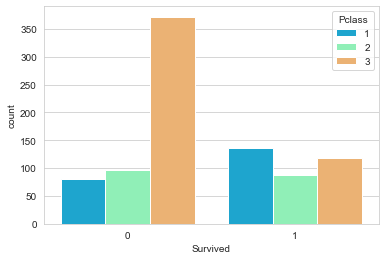

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=Tr,palette='rainbow',hue='Pclass')

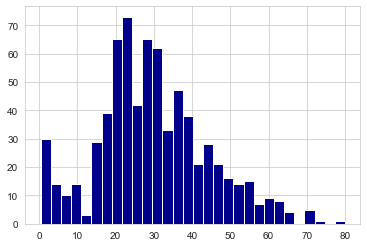

In [8]:
Tr['Age'].hist(bins=30,color='darkblue')

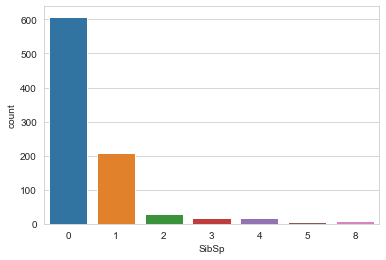

In [9]:
sns.countplot(x='SibSp',data=Tr)

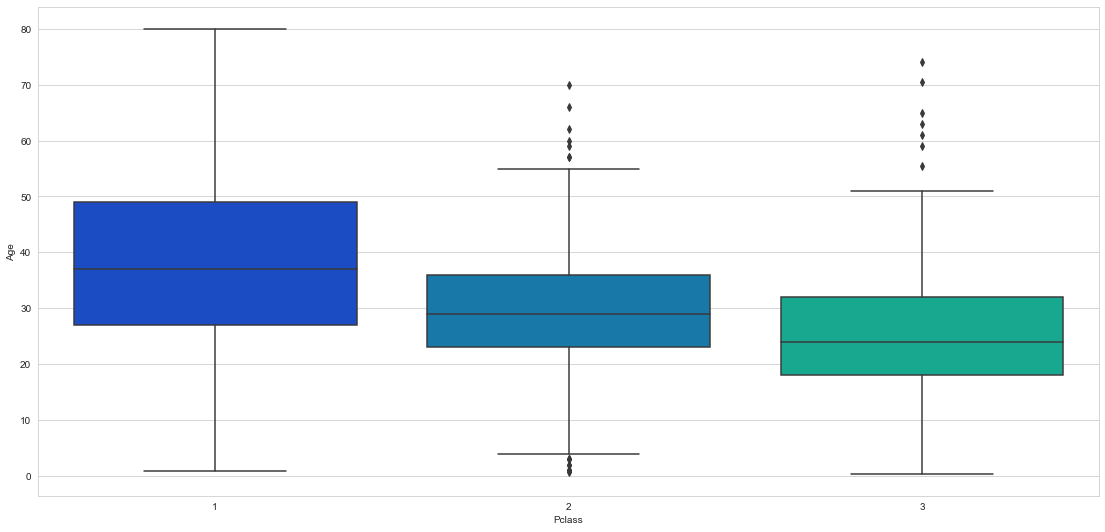

In [10]:
plt.figure(figsize=(19,9))
sns.boxplot(x='Pclass',y='Age',data=Tr,palette='winter')

In [11]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
Tr['Age']=Tr[['Age','Pclass']].apply(impute_age,axis=1)

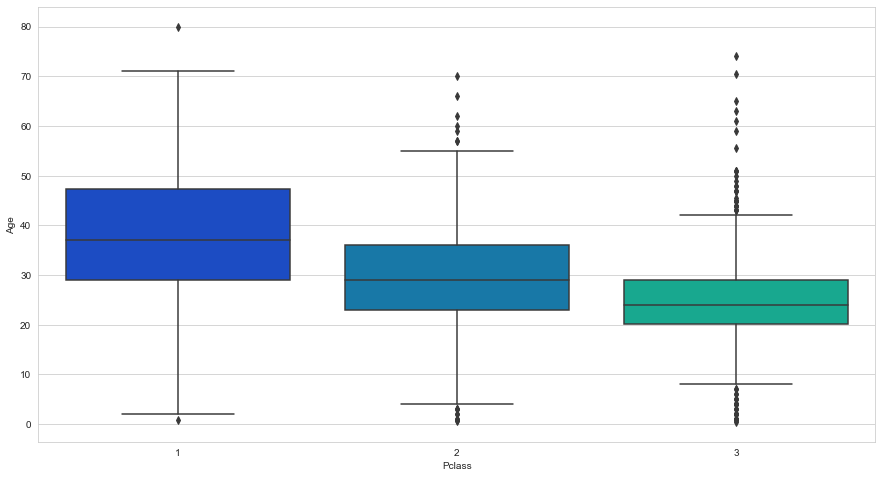

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass',y='Age',data=Tr,palette='winter')

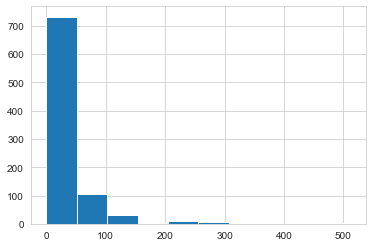

In [14]:
Tr['Fare'].hist()
plt.show()

In [15]:
Tr.drop('Cabin',axis=1,inplace=True)

In [16]:
Tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
Tr.dropna(inplace=True)

In [18]:
male=pd.get_dummies(Tr['Sex'],drop_first=True)
Tr=pd.concat([Tr,male],axis=1)
print(Tr.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  
0      0         A/5 21171   7.2500        S     1  
1      0          PC 17599  71.2833        C     0  
2      0  STON/O2. 3101282   7.9250        S     0  
3      0            113803  53.1000        S     0  
4      0            373450   8.0500        S     1  


In [19]:
Tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         889 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 70.3+ KB


In [20]:
male=pd.get_dummies(Tr['Sex'],drop_first=True)
Embark=pd.get_dummies(Tr['Embarked'],drop_first=True)
print(Tr.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  
0      0         A/5 21171   7.2500        S     1  
1      0          PC 17599  71.2833        C     0  
2      0  STON/O2. 3101282   7.9250        S     0  
3      0            113803  53.1000        S     0  
4      0            373450   8.0500        S     1  


In [21]:
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
Tr['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [24]:
Tr.shape

(889, 12)

In [25]:
male.shape

(889, 1)

In [26]:
Embark.shape

(889, 2)

In [27]:
Tr.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
Tr=pd.concat([Tr,male,Embark],axis=1)

In [29]:
Tr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(Tr.drop('Survived',axis=1), Tr['Survived'], test_size=0.20, random_state=55)

In [81]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\kiit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
Prd=logmodel.predict(X_test)

In [83]:
ACCUR=logmodel.score(X_test,y_test)

In [84]:
print(ACCUR)

0.8033707865168539


In [88]:
Conf=confusion_matrix(y_test,Prd)
print(Conf)

[[105   9]
 [ 26  38]]


In [90]:
Class_Rep=classification_report(y_test,Prd)
print(Class_Rep)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       114
           1       0.81      0.59      0.68        64

    accuracy                           0.80       178
   macro avg       0.81      0.76      0.77       178
weighted avg       0.80      0.80      0.80       178

